In [ ]:
import requests
import pandas as pd

In [ ]:
# Data preparation
df_traffic = pd.read_csv('data/trafiktaelling.csv')
df_traffic = df_traffic.drop(['FID'], axis=1)
df_traffic

,t_nr,vejnavn,beskrivelse,husnummer,type,taelling_type,ktj_7_19,tung_pct,aadt_koretojer,hvdt_koretojer,...,aar,link,tung_pct_real,ladcykler_pct_real,lastbiler_7_19,lastbiler_pct,elloebehjul_7_19,elloebehjul_pct,andre_busser_7_19,wkb_geometry
0,1,H.C. Andersens Boulevard,sydøst for Jarmers Plads,4 eller 5A,3.0,Andre faste tællinger,42650.0,"3,8",49900.0,55900.0,...,2016,http://kk.sites.itera.dk/apps/kk_trafik/pdf/UJ...,3.8,1.2,1016.0,NaN,NaN,NaN,NaN,POINT (12.565491397230991 55.67796084860272)
1,3,Bredgade,nord for Kongens Nytorv,3 eller 4,3.0,Andre faste tællinger,8984.0,"1,8",10500.0,11800.0,...,2020,https://kk.sites.itera.dk/apps/kk_trafik/pdf/M...,1.8,3.3,18.0,"0,2",NaN,NaN,NaN,POINT (12.587600106423727 55.68116360238515)
2,4,Christian d. IV's Bro,syd for Niels Juels Gade,ingen,3.0,Andre faste tællinger,11701.0,"0,2",13700.0,15300.0,...,2020,https://kk.sites.itera.dk/apps/kk_trafik/pdf/n...,0.2,2.8,NaN,NaN,NaN,NaN,NaN,POINT (12.587161874224892 55.67576459605928)
3,5,Dronning Louises Bro,øst for Nørrebrogade,NaN,2.0,Søsnittet,NaN,NaN,NaN,NaN,...,2020,https://kk.sites.itera.dk/apps/kk_trafik/pdf/s...,NaN,3.7,NaN,NaN,438.0,"1,4",NaN,POINT (12.563784830098982 55.68673054140091)
4,6,Kampmannsgade,ud for søerne,NaN,2.0,Søsnittet,3938.0,"2,2",4600.0,5200.0,...,2020,https://kk.sites.itera.dk/apps/kk_trafik/pdf/b...,2.2,2.8,29.0,"34,1",NaN,NaN,6.0,POINT (12.557917540101617 55.67797681383055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,10195,Sydhavnsgade-Borgmester Christiansens Gade-Fre...,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,2019,https://kk.sites.itera.dk/apps/kk_trafik/pdf/D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.542233637720141 55.64665981581368)
1073,10196,Vejlands Allé-Artillerivej-Selinevej,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,2019,https://kk.sites.itera.dk/apps/kk_trafik/pdf/5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.563594727350983 55.641493677099774)
1074,10197,Vejlands Allé-Center Boulvard,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,2018,https://kk.sites.itera.dk/apps/kk_trafik/pdf/m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575944159210048 55.640978432494656)
1075,10198,Vejlands Allé-Motorvejen_vestlig fletning,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,2019,https://kk.sites.itera.dk/apps/kk_trafik/pdf/E...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.553338532609525 55.641023522185684)


In [ ]:
print(f"Number of observations: {len(df_traffic)}")

Number of observations: 1077


In [ ]:
# Transform into datetime
df_traffic['date'] = pd.to_datetime(df_traffic.taelle_dato, format="%Y%m%d")
df_traffic['year'] = df_traffic['date'].dt.year # Year column

# Find start and end
print(f"Start: {df_traffic['date'].min()}, End: {df_traffic['date'].max()}")

# Columns to drop: FID, taelle_dato
# df_traffic.columns('tNumb', 'RoadName', 'Description', 'HouseNumb', 'Type', 'CountType', 'Vehicle_7_19', 'Heavy_pct', 
#                   'ADT_vehicle', 'WDT_vehicle', 'Bike_7_19', 'CargoBike_pct', )

Start: 2009-01-01 00:00:00, End: 2020-10-01 00:00:00


TypeError: 'Index' object is not callable

In [ ]:
df_traffic

,t_nr,vejnavn,beskrivelse,husnummer,type,taelling_type,ktj_7_19,tung_pct,aadt_koretojer,hvdt_koretojer,...,tung_pct_real,ladcykler_pct_real,lastbiler_7_19,lastbiler_pct,elloebehjul_7_19,elloebehjul_pct,andre_busser_7_19,wkb_geometry,date,year
0,1,H.C. Andersens Boulevard,sydøst for Jarmers Plads,4 eller 5A,3.0,Andre faste tællinger,42650.0,"3,8",49900.0,55900.0,...,3.8,1.2,1016.0,NaN,NaN,NaN,NaN,POINT (12.565491397230991 55.67796084860272),2016-09-21,2016
1,3,Bredgade,nord for Kongens Nytorv,3 eller 4,3.0,Andre faste tællinger,8984.0,"1,8",10500.0,11800.0,...,1.8,3.3,18.0,"0,2",NaN,NaN,NaN,POINT (12.587600106423727 55.68116360238515),2020-10-01,2020
2,4,Christian d. IV's Bro,syd for Niels Juels Gade,ingen,3.0,Andre faste tællinger,11701.0,"0,2",13700.0,15300.0,...,0.2,2.8,NaN,NaN,NaN,NaN,NaN,POINT (12.587161874224892 55.67576459605928),2020-09-08,2020
3,5,Dronning Louises Bro,øst for Nørrebrogade,NaN,2.0,Søsnittet,NaN,NaN,NaN,NaN,...,NaN,3.7,NaN,NaN,438.0,"1,4",NaN,POINT (12.563784830098982 55.68673054140091),2020-09-23,2020
4,6,Kampmannsgade,ud for søerne,NaN,2.0,Søsnittet,3938.0,"2,2",4600.0,5200.0,...,2.2,2.8,29.0,"34,1",NaN,NaN,6.0,POINT (12.557917540101617 55.67797681383055),2020-08-02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,10195,Sydhavnsgade-Borgmester Christiansens Gade-Fre...,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.542233637720141 55.64665981581368),2019-09-12,2019
1073,10196,Vejlands Allé-Artillerivej-Selinevej,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.563594727350983 55.641493677099774),2019-09-12,2019
1074,10197,Vejlands Allé-Center Boulvard,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575944159210048 55.640978432494656),2018-12-18,2018
1075,10198,Vejlands Allé-Motorvejen_vestlig fletning,Krydstælling,NaN,101.0,Krydstællinger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.553338532609525 55.641023522185684),2019-09-10,2019


In [ ]:
df_traffic[df_traffic['year'] == 2019].groupby('date').size()

date
2019-05-07    5
2019-05-08    6
2019-05-09    6
2019-05-14    7
2019-05-15    7
2019-05-21    4
2019-05-22    6
2019-05-23    7
2019-05-28    3
2019-06-06    5
2019-06-12    6
2019-06-13    5
2019-06-18    4
2019-06-19    1
2019-06-20    4
2019-06-25    5
2019-06-26    5
2019-06-27    6
2019-07-27    1
2019-08-28    2
2019-09-03    6
2019-09-04    6
2019-09-05    4
2019-09-10    8
2019-09-11    6
2019-09-12    7
2019-09-17    8
2019-09-18    3
2019-09-19    5
2019-09-24    1
2019-09-25    3
2019-09-26    6
2019-10-01    4
dtype: int64

In [ ]:
df_traffic['date'].dt.year.value_counts()

2015    182
2016    163
2019    162
2014    120
2018     89
2017     75
2013     68
2011     63
2012     60
2010     45
2009     44
2020      6
Name: date, dtype: int64

In [ ]:
df_traffic.groupby('year')['ktj_7_19'].mean()

year
2009     2802.037037
2010     2366.346154
2011     5754.545455
2012     6702.777778
2013     5464.705882
2014     4847.813559
2015     5719.890411
2016     8161.000000
2017     7397.047619
2018     8296.152542
2019    13186.472727
2020    12375.600000
Name: ktj_7_19, dtype: float64

In [ ]:
df_traffic.groupby('year')['elloebehjul_7_19'].mean()

year
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013           NaN
2014           NaN
2015           NaN
2016           NaN
2017           NaN
2018           NaN
2019    132.217391
2020    438.000000
Name: elloebehjul_7_19, dtype: float64

In [ ]:
df_traffic.groupby('year')['cykler_7_19'].mean()

year
2009     1486.233333
2010     1728.354839
2011     1995.481481
2012     3072.222222
2013     4041.176471
2014     3677.260870
2015     3463.428571
2016     3928.105263
2017     2223.111111
2018     5140.117647
2019     5869.082645
2020    10676.833333
Name: cykler_7_19, dtype: float64

In [ ]:
df_traffic.groupby('year')['lastbiler_7_19'].mean()

year
2009    118.000000
2010     23.750000
2011    160.700000
2012    225.857143
2013    127.166667
2014    132.400000
2015    141.739130
2016    302.818182
2017    360.787879
2018    171.514706
2019    335.877358
2020    198.000000
Name: lastbiler_7_19, dtype: float64

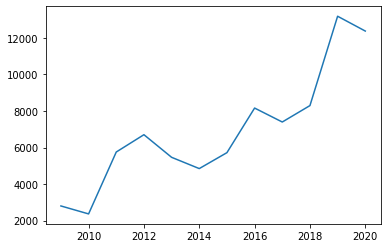

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_traffic.groupby('year')['ktj_7_19'].mean())

In [ ]:
hej

## Weather data

In [ ]:
# (lon, lat) 12.447848326393638, 55.606375666851676
# 55.73107930538074, 12.692825590170797

url = 'https://dmigw.govcloud.dk/v2/metObs/collections/observation/items' 

header={'X-Gravitee-Api-Key': api_key} #hidden 

# Parameters: https://confluence.govcloud.dk/pages/viewpage.action?pageId=26476616
param_list = ['temp_mean_past1h', 'wind_dir_past1h','wind_speed_past1h','precip_past1h', 'weather']

#Construct weather dataframe
df_weather = pd.DataFrame()

for param in param_list:

    # Specify query parameters
    params = {'datetime' : '2005-01-01T00:00:00Z/2014-12-31T23:59:00Z',
            'parameterId' : param,
            'limit' : '300000',
            # Use bbox from above
            'bbox' : '12.447848326393638,55.606375666851676,12.692825590170797,55.73107930538074'
            }


    r = requests.get(url,headers=header,params=params) # submit GET request based on url and headers
    json_t = r.json()['features']
    df_weather_t = pd.json_normalize(json_t)
    df_weather = pd.concat([df_weather, df_weather_t])

<Response [200]> https://dmigw.govcloud.dk/v2/metObs/collections/observation/items?datetime=2005-01-01T00%3A00%3A00Z%2F2014-12-31T23%3A59%3A00Z&parameterId=temp_mean_past1h&limit=300000&bbox=12.447848326393638%2C55.606375666851676%2C12.692825590170797%2C55.73107930538074
<Response [200]> https://dmigw.govcloud.dk/v2/metObs/collections/observation/items?datetime=2005-01-01T00%3A00%3A00Z%2F2014-12-31T23%3A59%3A00Z&parameterId=wind_dir_past1h&limit=300000&bbox=12.447848326393638%2C55.606375666851676%2C12.692825590170797%2C55.73107930538074
<Response [200]> https://dmigw.govcloud.dk/v2/metObs/collections/observation/items?datetime=2005-01-01T00%3A00%3A00Z%2F2014-12-31T23%3A59%3A00Z&parameterId=wind_speed_past1h&limit=300000&bbox=12.447848326393638%2C55.606375666851676%2C12.692825590170797%2C55.73107930538074
<Response [200]> https://dmigw.govcloud.dk/v2/metObs/collections/observation/items?datetime=2005-01-01T00%3A00%3A00Z%2F2014-12-31T23%3A59%3A00Z&parameterId=precip_past1h&limit=300000&b

In [ ]:
df_weather['properties.parameterId'].unique()

array(['temp_mean_past1h', 'wind_dir_past1h', 'wind_speed_past1h',
       'precip_past1h', 'weather'], dtype=object)

In [ ]:
df_weather

,id,type,geometry.coordinates,geometry.type,properties.created,properties.observed,properties.parameterId,properties.stationId,properties.value
0,4debab73-a20f-e3e3-b2bf-0d3571f1c03a,Feature,"[12.6455, 55.614]",Point,2022-02-23T04:21:36.478108Z,2014-12-31T23:00:00Z,temp_mean_past1h,06180,5.0
1,2311654c-ce3f-bcb5-eefc-d2c6024e742b,Feature,"[12.6455, 55.614]",Point,2022-02-23T04:21:36.334375Z,2014-12-31T22:00:00Z,temp_mean_past1h,06180,5.2
2,847bb3a8-5880-d74f-5356-c46e59223e24,Feature,"[12.6455, 55.614]",Point,2022-02-23T04:21:36.148388Z,2014-12-31T21:00:00Z,temp_mean_past1h,06180,5.5
3,da1c8a09-3fdb-1431-e210-f3c5eaf4c9cd,Feature,"[12.6455, 55.614]",Point,2022-02-23T04:21:35.978337Z,2014-12-31T20:00:00Z,temp_mean_past1h,06180,5.8
4,7e60a495-cefc-ccbb-8cfd-2239ed6714ed,Feature,"[12.6455, 55.614]",Point,2022-02-23T04:21:35.831114Z,2014-12-31T19:00:00Z,temp_mean_past1h,06180,5.8
...,...,...,...,...,...,...,...,...,...
16301,37696507-a1ca-2796-c695-4b42f936a51c,Feature,"[12.6455, 55.614]",Point,2022-02-23T09:33:02.397711Z,2005-01-01T12:00:00Z,weather,06180,10.0
16302,c0f91da4-99ef-7eea-4853-26f9c0f99766,Feature,"[12.6455, 55.614]",Point,2022-02-23T09:33:02.394710Z,2005-01-01T09:00:00Z,weather,06180,10.0
16303,c71b653c-84d9-dfc0-34b1-005c4a5c3b9c,Feature,"[12.6455, 55.614]",Point,2022-02-23T09:33:02.391423Z,2005-01-01T06:00:00Z,weather,06180,2.0
16304,166379dd-2aa4-8914-20d2-9aafdea39d36,Feature,"[12.6455, 55.614]",Point,2022-02-23T09:33:02.388680Z,2005-01-01T03:00:00Z,weather,06180,46.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61ec0a5b-e327-402f-95c1-91c4aeb91c25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>